<a href="https://colab.research.google.com/github/anton-gavrilin/machine_learning_labs/blob/main/cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load usable libraries from tensorflow, and mathematical numpy, and for visualizing matplotlib

In [4]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

Load data of clothing dataset "Fashion MNIST", that have 60.000 data and 10 types of it. Immediately divide data for train and test

4422102/4422102 [==============================] - 0s 0us/step


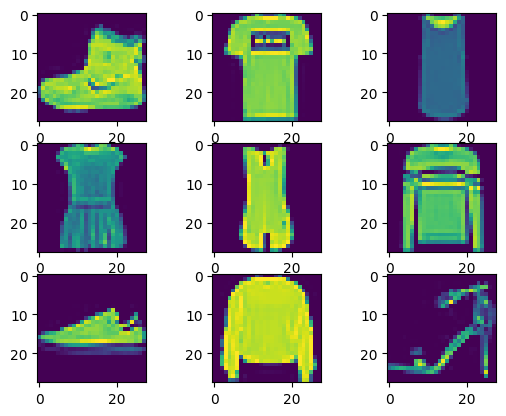

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
   plt.subplot(330 + 1 + i)
   plt.imshow(X_train[i])

plt.show()

Normalizing the data to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Converts a class vector to binary class matrix with 'to_categorical'.

In [18]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Used layers to perform different operations on input data: Conv2D-Convolutional Layer, Flatten-Flatten Layer, Dense-Fully Connected Layer, Dropout-Dropout layer.

Created simple CNN model with 2 convolutional layers, 2 max pooling layers, a fully connected layer, and an output layer. The model is compiled with 'categorical_crossentropy' loss and Adam optimizer


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
938/938 [==============================] - 64s 67ms/step - loss: 0.6211 - accuracy: 0.7749 - val_loss: 0.4039 - val_accuracy: 0.8520
Epoch 2/10
938/938 [==============================] - 66s 71ms/step - loss: 0.4114 - accuracy: 0.8521 - val_loss: 0.3394 - val_accuracy: 0.8744
Epoch 3/10
938/938 [==============================] - 64s 68ms/step - loss: 0.3576 - accuracy: 0.8714 - val_loss: 0.3185 - val_accuracy: 0.8819
Epoch 4/10
938/938 [==============================] - 61s 65ms/step - loss: 0.3236 - accuracy: 0.8834 - val_loss: 0.2917 - val_accuracy: 0.8950
Epoch 5/10
938/938 [==============================] - 61s 65ms/step - loss: 0.2970 - accuracy: 0.8924 - val_loss: 0.2757 - val_accuracy: 0.9005
Epoch 6/10
938/938 [==============================] - 64s 68ms/step - loss: 0.2785 - accuracy: 0.8989 - val_loss: 0.2732 - val_accuracy: 0.8992
Epoch 7/10
938/938 [==============================] - 62s 66ms/step - loss: 0.2628 - accuracy: 0.9037 - val_loss: 0.2600 - val_accuracy:

Plot a random sample of test images with their predicted labels

1/1 [==============================] - 0s 43ms/step


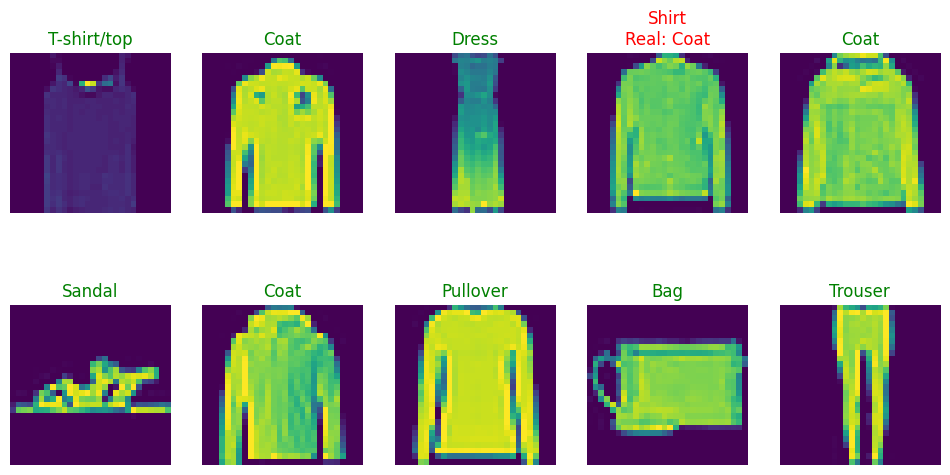

In [17]:
random_indexes = np.random.randint(0, len(X_test), size=10)

# Predict class probabilities for the test samples
y_pred_probs = model.predict(X_test[random_indexes])

# Convert class probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indexes):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index])
    plt.axis('off')
    real = class_names[np.argmax(y_test[index])]
    predicted = class_names[y_pred_labels[i]]
    
    title = f'{predicted}'
    if predicted == real:
      color = 'green'
    else:
      color = 'red'
      title += f'\nReal: {real}'

    plt.title(title, color=color)
plt.show()